In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set(font_scale=1, color_codes=True)

from matplotlib import pyplot as plt

In [5]:
population = pd.read_csv('../data/countries.csv')
population.head()

,country,year,population
0,Afghanistan,1952,8425333
1,Afghanistan,1957,9240934
2,Afghanistan,1962,10267083
3,Afghanistan,1967,11537966
4,Afghanistan,1972,13079460


## Population Data

In [6]:
population.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1704 entries, 0 to 1703
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   country     1704 non-null   object
 1   year        1704 non-null   int64 
 2   population  1704 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 40.1+ KB


In [7]:
population.country == 'afghanistan'

0       False
1       False
2       False
3       False
4       False
        ...  
1699    False
1700    False
1701    False
1702    False
1703    False
Name: country, Length: 1704, dtype: bool

In [8]:
indian = population[population.country == 'India']
chinese = population[population.country == 'China']

In [9]:
indian

,country,year,population
696,India,1952,372000000
697,India,1957,409000000
698,India,1962,454000000
699,India,1967,506000000
700,India,1972,567000000
701,India,1977,634000000
702,India,1982,708000000
703,India,1987,788000000
704,India,1992,872000000
705,India,1997,959000000


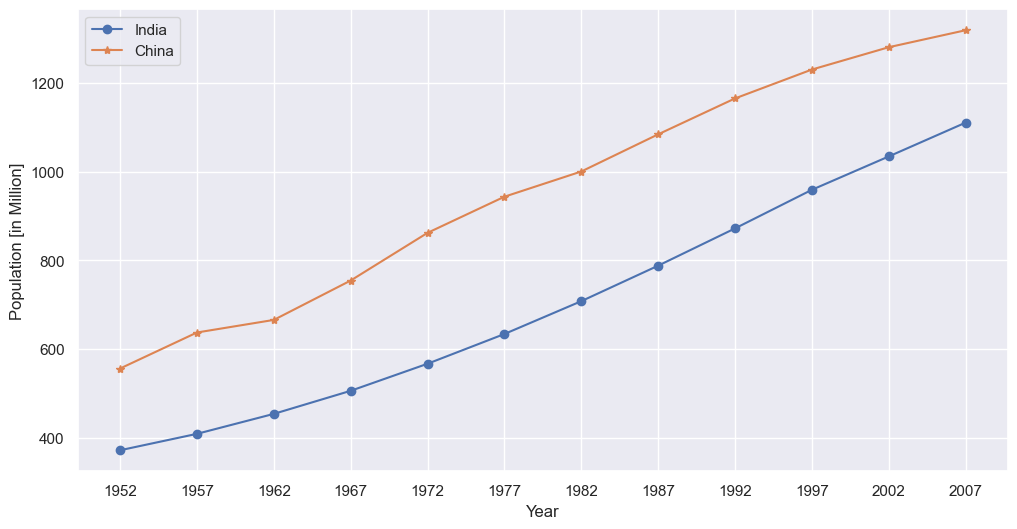

In [10]:
plt.figure(figsize=(12,6))
plt.plot(indian.year, indian.population / 10**6, '-o', label=r'India')
plt.plot(chinese.year, chinese.population / 10**6, '-*', label=r'China')
plt.legend()

plt.ylabel(r'Population [in Million]')
plt.xlabel(r'Year')

plt.xticks(indian.year)

plt.show()

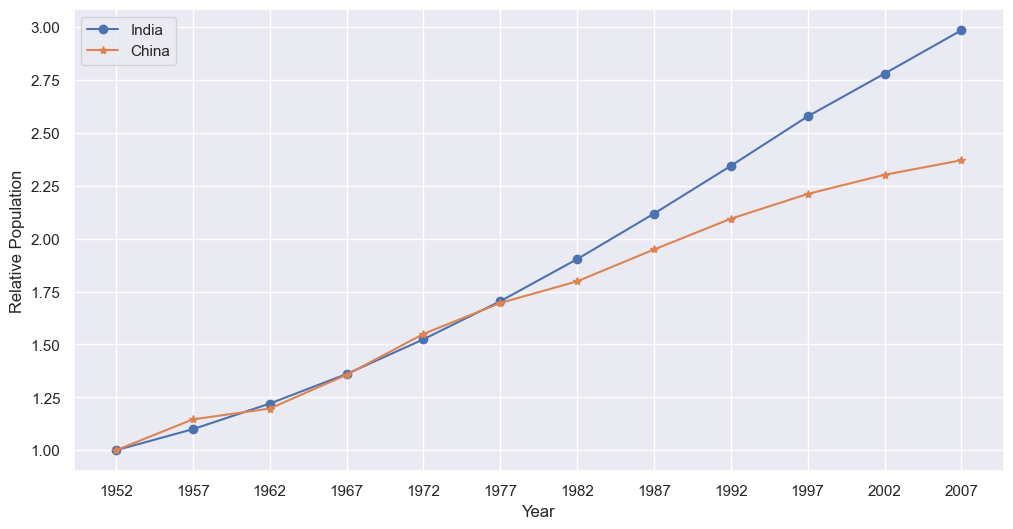

In [11]:
plt.figure(figsize=(12,6))
plt.plot(indian.year, indian.population / indian.population.iloc[0], '-o', label=r'India')
plt.plot(chinese.year, chinese.population / chinese.population.iloc[0], '-*', label=r'China')
plt.legend()

plt.ylabel(r'Relative Population')
plt.xlabel(r'Year')

plt.xticks(indian.year)

plt.show()

**Checkpoint:** Can you make any inferences from this plot?

In [12]:
start = population[(population.year == 1952) & (population.population > 3e7)]
# start = population[(population.year == 1952) & (population.population > 3e7)].sort_values(by=['population'],ascending=False)
# start = population[(population.year == 1952) & (population.population > 3e7)].sort_values(by=['population'],ascending=False).iloc[:10]

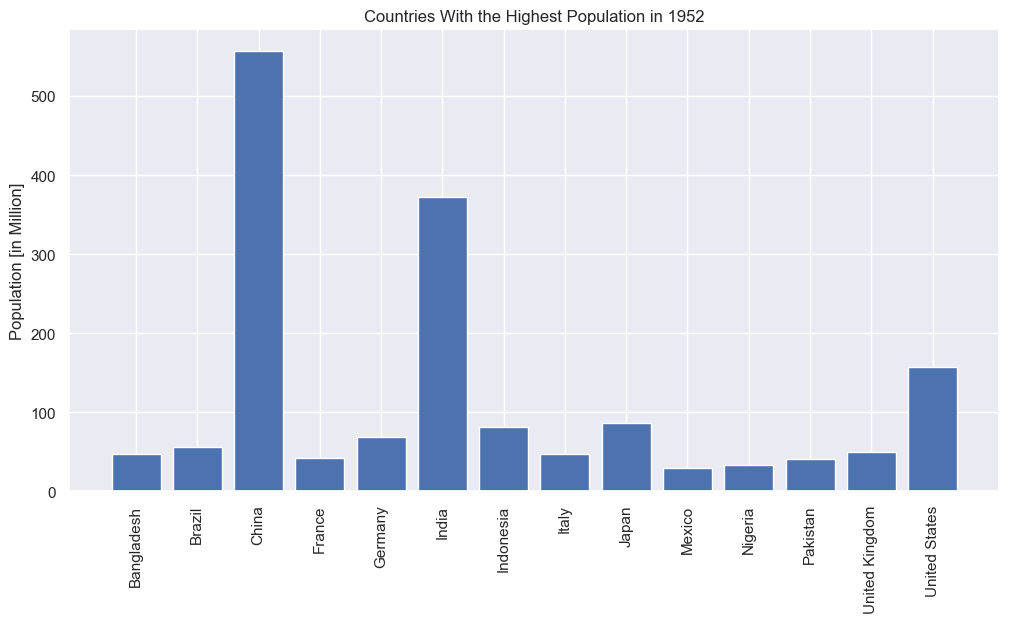

In [13]:
plt.figure(figsize=(12,6))
plt.bar(start.country, start.population / 1e6)
plt.title(r'Countries With the Highest Population in 1952')
plt.ylabel(r'Population [in Million]')
plt.xticks(rotation = 90);

In [14]:
end = population[(population.year == 2007) & (population.population > 3e7)]
# end = population[(population.year == 2007) & (population.population > 3e7)].sort_values(by=['population'],ascending=False)
# end = population[(population.year == 2007) & (population.population > 3e7)].sort_values(by=['population'],ascending=False).iloc[:10]

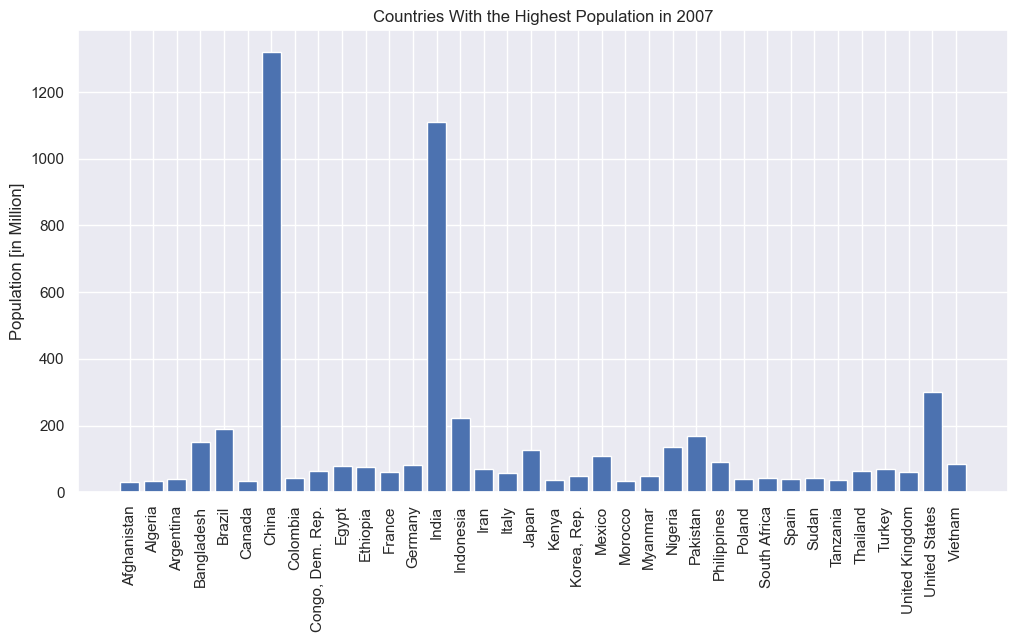

In [15]:
plt.figure(figsize=(12,6))
plt.bar(end.country, end.population / 1e6)
plt.title(r'Countries With the Highest Population in 2007')
plt.ylabel(r'Population [in Million]')
plt.xticks(rotation = 90);

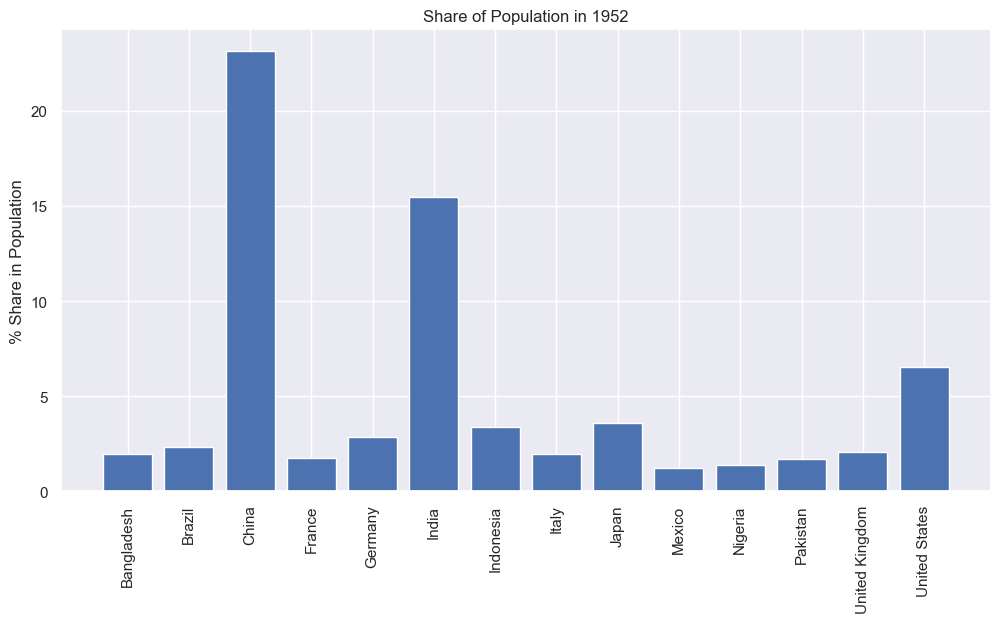

In [16]:
plt.figure(figsize=(12,6))
plt.bar(start.country, start.population / population[population.year==1952].population.sum() * 100)
plt.title(r'Share of Population in 1952')
plt.ylabel(r'% Share in Population')
plt.xticks(rotation = 90);

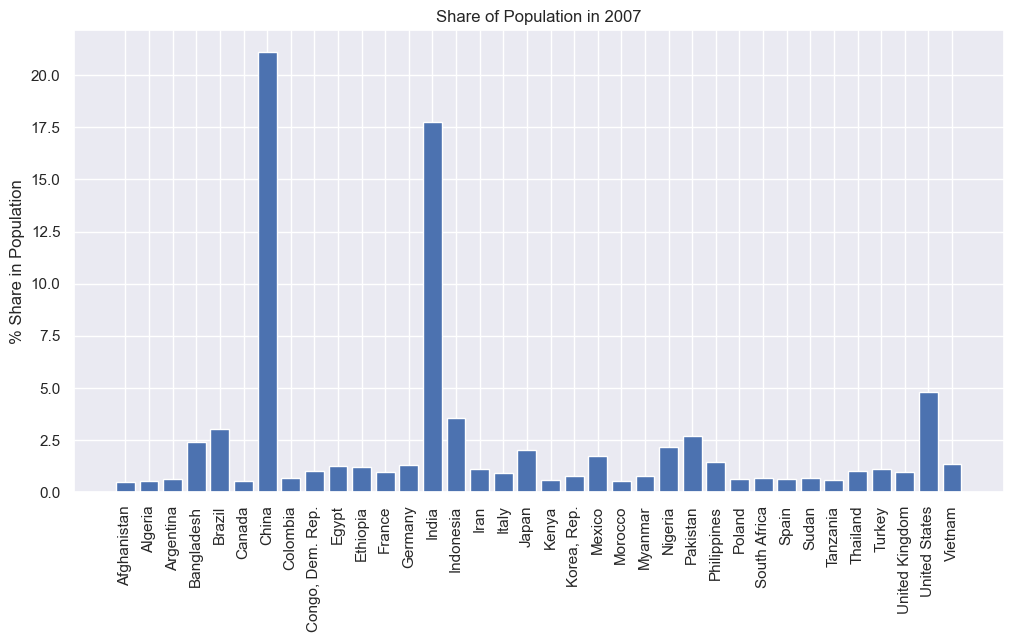

In [17]:
plt.figure(figsize=(12,6))
plt.bar(end.country, end.population / population[population.year==2007].population.sum() * 100)
plt.title(r'Share of Population in 2007')
plt.ylabel(r'% Share in Population')
plt.xticks(rotation = 90);

## Gas Prices

In [18]:
gas_data = pd.read_csv('../data/gas_prices.csv')
gas_data.head()

,Year,Australia,Canada,France,Germany,Italy,Japan,Mexico,South Korea,UK,USA
0,1990,NaN,1.87,3.63,2.65,4.59,3.16,1.00,2.05,2.82,1.16
1,1991,1.96,1.92,3.45,2.90,4.50,3.46,1.30,2.49,3.01,1.14
2,1992,1.89,1.73,3.56,3.27,4.53,3.58,1.50,2.65,3.06,1.13
3,1993,1.73,1.57,3.41,3.07,3.68,4.16,1.56,2.88,2.84,1.11
4,1994,1.84,1.45,3.59,3.52,3.70,4.36,1.48,2.87,2.99,1.11


In [19]:
gas_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Year         19 non-null     int64  
 1   Australia    18 non-null     float64
 2   Canada       19 non-null     float64
 3   France       19 non-null     float64
 4   Germany      19 non-null     float64
 5   Italy        19 non-null     float64
 6   Japan        19 non-null     float64
 7   Mexico       19 non-null     float64
 8   South Korea  19 non-null     float64
 9   UK           19 non-null     float64
 10  USA          19 non-null     float64
dtypes: float64(10), int64(1)
memory usage: 1.8 KB


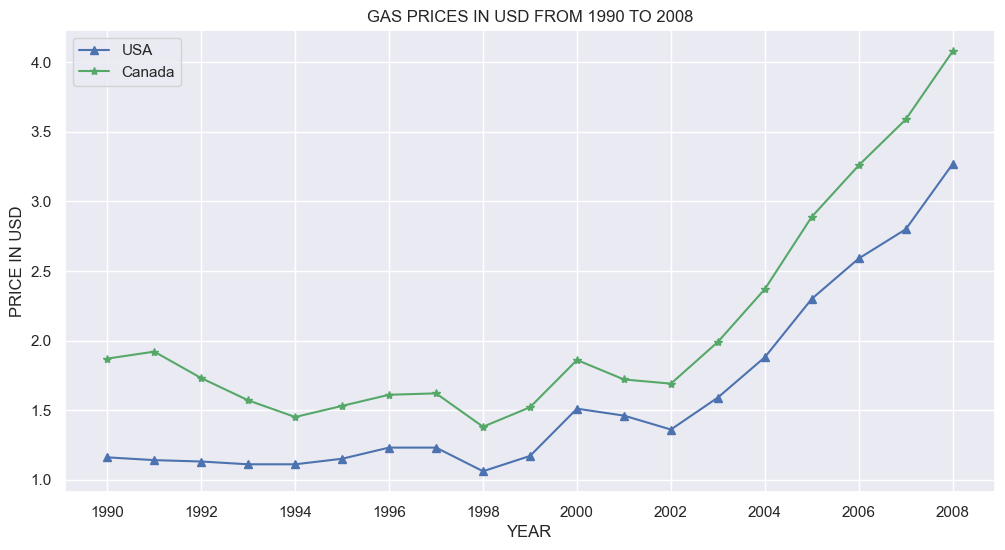

In [20]:
plt.figure(figsize=(12,6))
# plt.plot(gas_data.Year, gas_data.Australia, label=r'Australia')
# plt.plot(gas_data.Year, gas_data.UK, label=r'UK')
plt.plot(gas_data.Year, gas_data.USA, 'b^-', label=r'USA')
plt.plot(gas_data.Year, gas_data.Canada, 'g*-', label=r'Canada')

plt.legend()

plt.title(r'GAS PRICES IN USD FROM 1990 TO 2008')

plt.xlabel(r'YEAR')
plt.ylabel(r'PRICE IN USD')

plt.xticks(gas_data.Year[::2]);

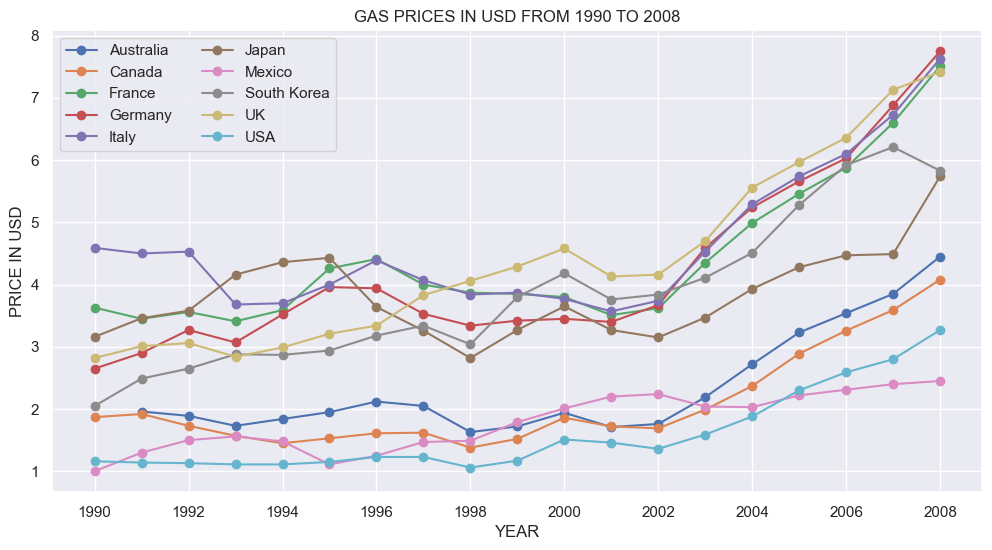

In [21]:
plt.figure(figsize=(12,6))
for country in gas_data:
    if country != 'Year':
        plt.plot(gas_data.Year, gas_data[country], 'o-', label=country)

plt.legend(ncol=2)

plt.title(r'GAS PRICES IN USD FROM 1990 TO 2008')

plt.xlabel(r'YEAR')
plt.ylabel(r'PRICE IN USD')

plt.xticks(gas_data.Year[::2]);

### Summarising Gas Prices

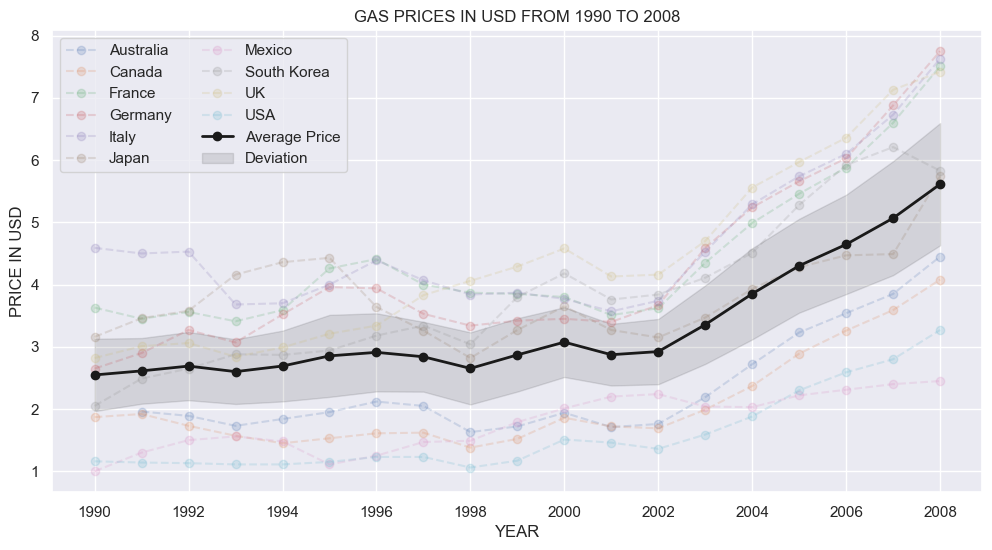

In [22]:
plt.figure(figsize=(12,6))
for country in gas_data:
    if country != 'Year':
        plt.plot(gas_data.Year, gas_data[country], 'o--', label=country, alpha=0.2)

mean_price = gas_data.drop(['Year'], axis=1).mean(axis=1)
std_price = gas_data.drop(['Year'], axis=1).std(axis=1)
plt.plot(gas_data.Year, mean_price, 'ko-', linewidth=2, label=r'Average Price')
plt.fill_between(gas_data.Year, mean_price-0.5*std_price, mean_price+0.5*std_price, color='black', label=r'Deviation', alpha=0.1)

plt.legend(ncol=2)

plt.title(r'GAS PRICES IN USD FROM 1990 TO 2008')

plt.xlabel(r'YEAR')
plt.ylabel(r'PRICE IN USD')

plt.xticks(gas_data.Year[::2]);

In [23]:
gas_data.corr()
# gas_data.corr().iloc[10,2]

,Year,Australia,Canada,France,Germany,Italy,Japan,Mexico,South Korea,UK,USA
Year,1.000000,0.761861,0.743494,0.783013,0.850042,0.650927,0.450672,0.916437,0.949350,0.940524,0.841465
Australia,0.761861,1.000000,0.984879,0.980250,0.976130,0.982878,0.790025,0.651233,0.884736,0.905756,0.975917
Canada,0.743494,0.984879,1.000000,0.945870,0.935075,0.970192,0.743415,0.691224,0.865753,0.904195,0.983083
France,0.783013,0.980250,0.945870,1.000000,0.981924,0.951436,0.774489,0.625543,0.870020,0.913211,0.958066
Germany,0.850042,0.976130,0.935075,0.981924,1.000000,0.920420,0.777531,0.721284,0.913963,0.937122,0.965215
Italy,0.650927,0.982878,0.970192,0.951436,0.920420,1.000000,0.731602,0.547230,0.776858,0.843946,0.932612
Japan,0.450672,0.790025,0.743415,0.774489,0.777531,0.731602,1.000000,0.391669,0.595976,0.585465,0.742593
Mexico,0.916437,0.651233,0.691224,0.625543,0.721284,0.547230,0.391669,1.000000,0.886279,0.851356,0.777122
South Korea,0.949350,0.884736,0.865753,0.870020,0.913963,0.776858,0.595976,0.886279,1.000000,0.973141,0.928654
UK,0.940524,0.905756,0.904195,0.913211,0.937122,0.843946,0.585465,0.851356,0.973141,1.000000,0.952380


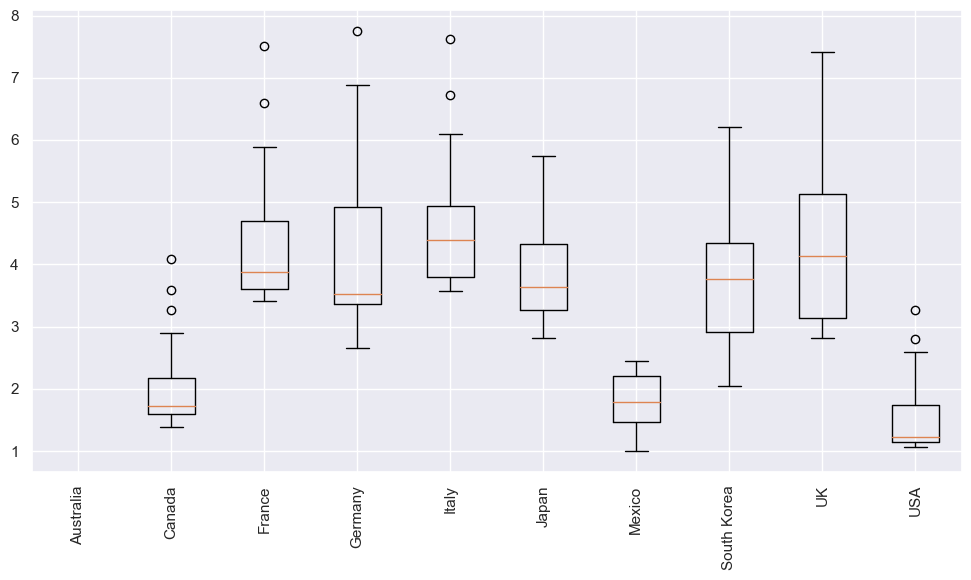

In [24]:
labels = []
for country in gas_data:
    if country != 'Year':
        labels.append(country)

# gas_data.Australia.iloc[0] = 1
        
plt.figure(figsize=(12,6))
plt.boxplot(gas_data.drop("Year", axis=1), labels=labels)
plt.xticks(rotation = 90);

## FIFA Players

In [25]:
fifa_players = pd.read_csv('../data/fifa_data.csv')
fifa_players.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [26]:
fifa_players.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 89 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                18207 non-null  int64  
 1   ID                        18207 non-null  int64  
 2   Name                      18207 non-null  object 
 3   Age                       18207 non-null  int64  
 4   Photo                     18207 non-null  object 
 5   Nationality               18207 non-null  object 
 6   Flag                      18207 non-null  object 
 7   Overall                   18207 non-null  int64  
 8   Potential                 18207 non-null  int64  
 9   Club                      17966 non-null  object 
 10  Club Logo                 18207 non-null  object 
 11  Value                     18207 non-null  object 
 12  Wage                      18207 non-null  object 
 13  Special                   18207 non-null  int64  
 14  Prefer

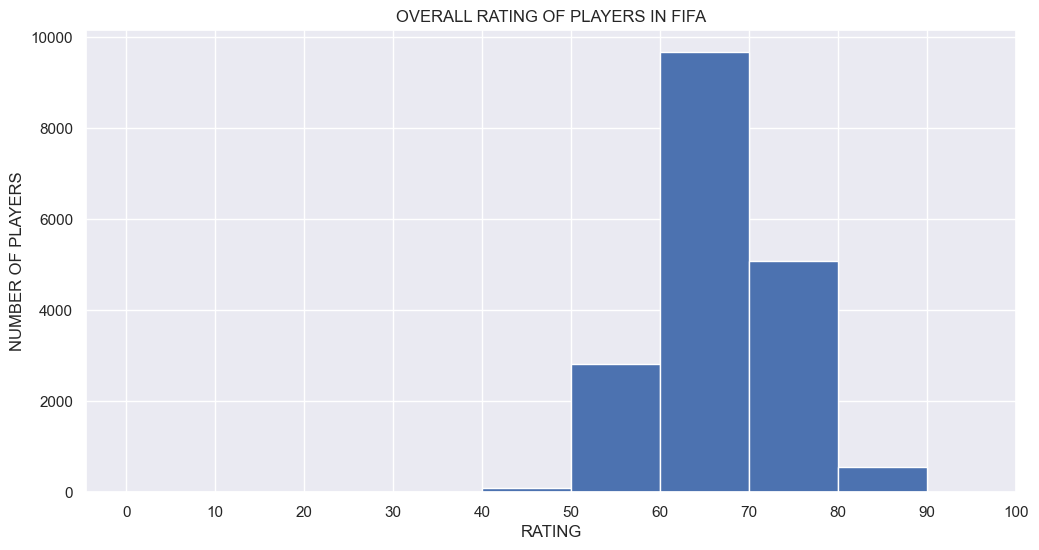

In [29]:
plt.figure(figsize=(12,6))

plt.hist(fifa_players.Overall, bins=np.arange(0,100,10))

plt.title(r'OVERALL RATING OF PLAYERS IN FIFA')
plt.xlabel(r'RATING')
plt.ylabel(r'NUMBER OF PLAYERS')

plt.xticks(np.arange(0,110,10));

In [30]:
lefties = fifa_players.loc[fifa_players['Preferred Foot'] == 'Left'].count()[0]
righties = fifa_players.loc[fifa_players['Preferred Foot'] == 'Right'].count()[0]

Text(0.5, 1.0, 'PREFERRED FOOT OF PLAYERS IN FIFA')

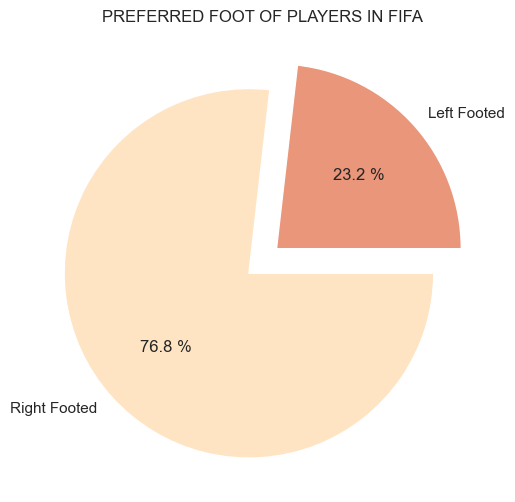

In [31]:
plt.figure(figsize=(12,6))
plt.pie([lefties, righties], labels=['Left Footed', 'Right Footed'], colors=['darksalmon','bisque'], autopct='%.1f %%', explode=(.1,.1))
plt.title(r'PREFERRED FOOT OF PLAYERS IN FIFA')


# Plotting Distributions Using Pandas and Seaborn

In [32]:
weather = pd.read_csv('../data/london_weather.csv')

In [33]:
weather.head()

,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
0,19790101,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0
1,19790102,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0
2,19790103,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0
3,19790104,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0
4,19790105,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0


In [34]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15341 entries, 0 to 15340
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date              15341 non-null  int64  
 1   cloud_cover       15322 non-null  float64
 2   sunshine          15341 non-null  float64
 3   global_radiation  15322 non-null  float64
 4   max_temp          15335 non-null  float64
 5   mean_temp         15305 non-null  float64
 6   min_temp          15339 non-null  float64
 7   precipitation     15335 non-null  float64
 8   pressure          15337 non-null  float64
 9   snow_depth        13900 non-null  float64
dtypes: float64(9), int64(1)
memory usage: 1.2 MB


## Univariate Distributions

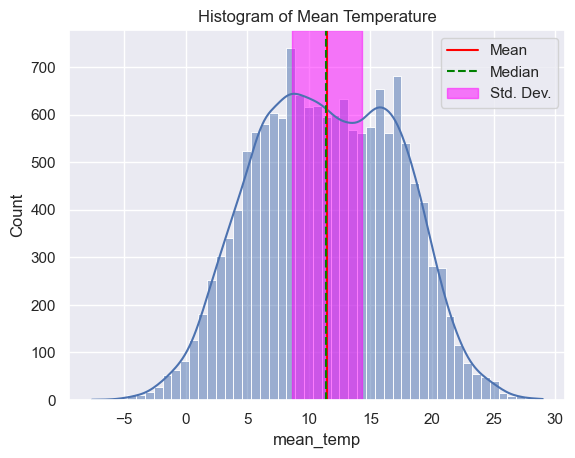

In [35]:
ax = sns.histplot(weather.mean_temp, kde=True).set(title=r'Histogram of Mean Temperature')
plt.axvline(x=weather.mean_temp.mean(), color='red', label=r'Mean')
plt.axvline(x=weather.mean_temp.median(), color='green', linestyle='--', label=r'Median')
plt.axvspan(weather.mean_temp.mean()-0.5*weather.mean_temp.std(), weather.mean_temp.mean()+0.5*weather.mean_temp.std(), alpha=0.5, color='magenta', label=r'Std. Dev.')
plt.legend();

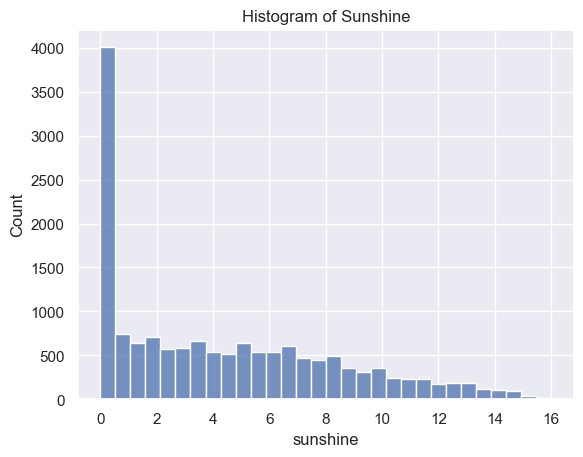

In [36]:
sns.histplot(weather.sunshine, kde=False).set(title=r'Histogram of Sunshine');
# plt.ylim([0,15000]);

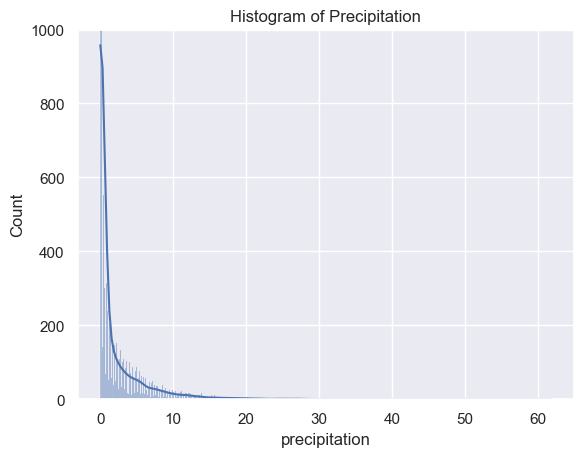

In [37]:
sns.histplot(weather.precipitation, kde=True).set(title=r'Histogram of Precipitation')
plt.ylim([0,1000]);

## Joint Distributions

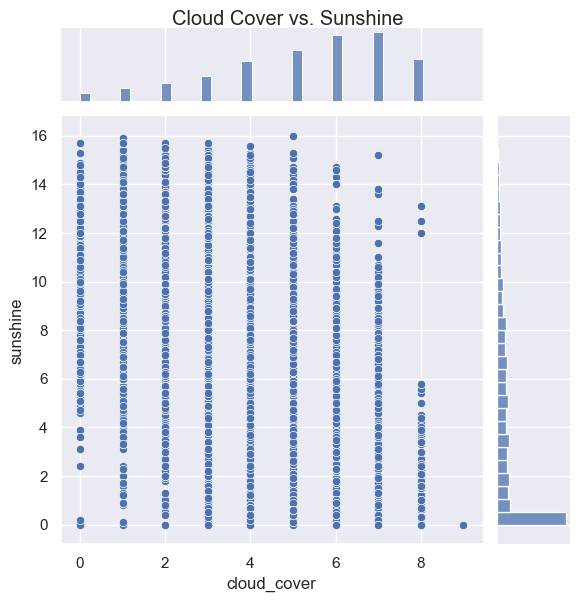

In [38]:
p = sns.jointplot(data=weather, x='cloud_cover', y='sunshine')
# p = sns.jointplot(data=weather, x='cloud_cover', y='sunshine', kind='hex')
# p = sns.jointplot(data=weather, x='cloud_cover', y='sunshine', kind='kde')
plt.suptitle("Cloud Cover vs. Sunshine", y=1);